In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    SimpleRNN,
    LayerNormalization,
    Dense,
    Attention,
)

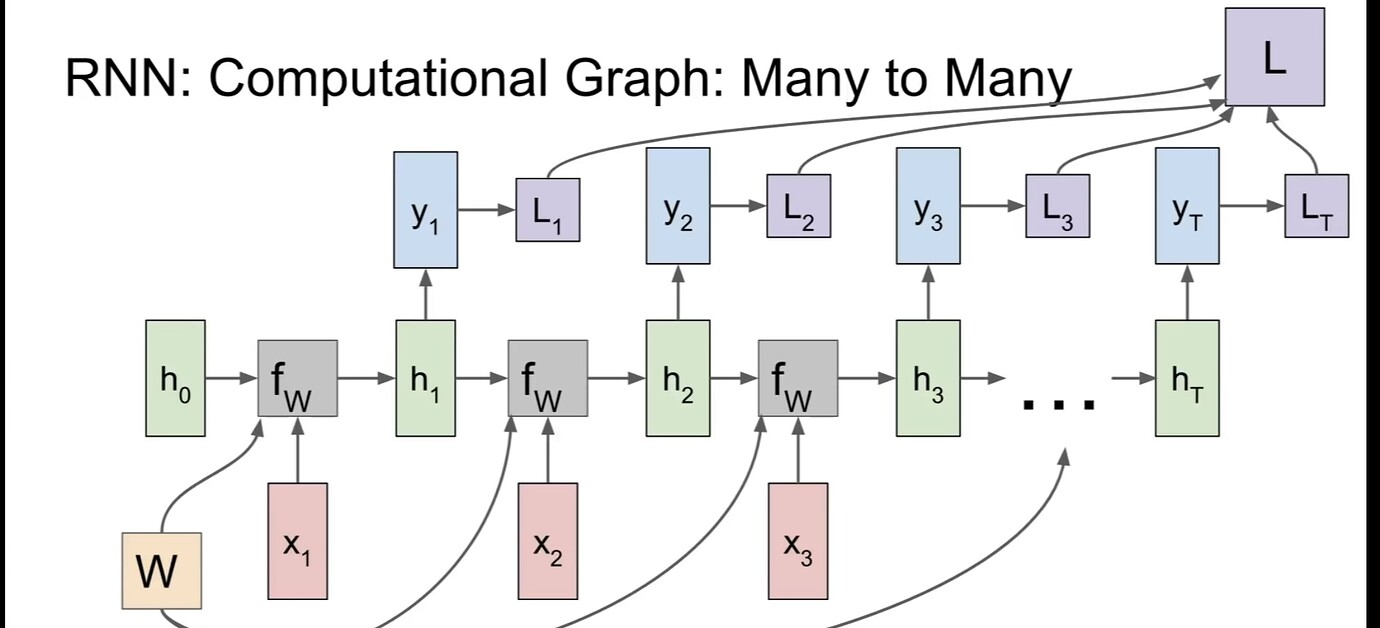

# SimpleRNN / RNN Cell

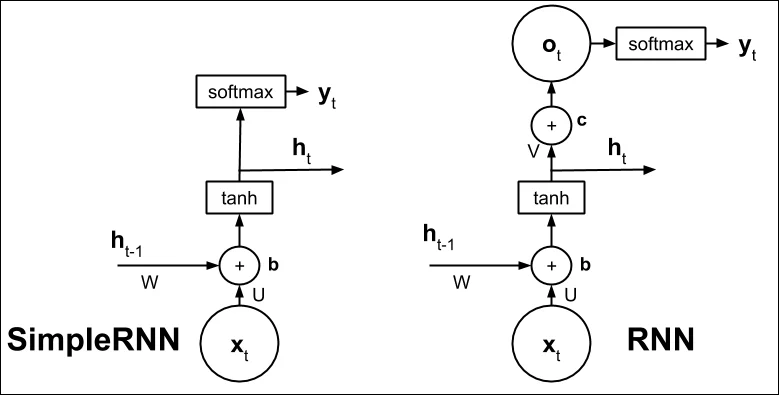

# LSTM Cell

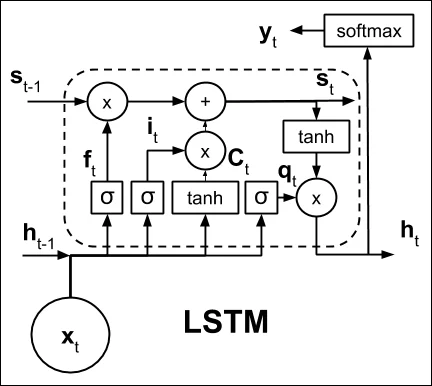

# RNN / LSTM / GRU Cell

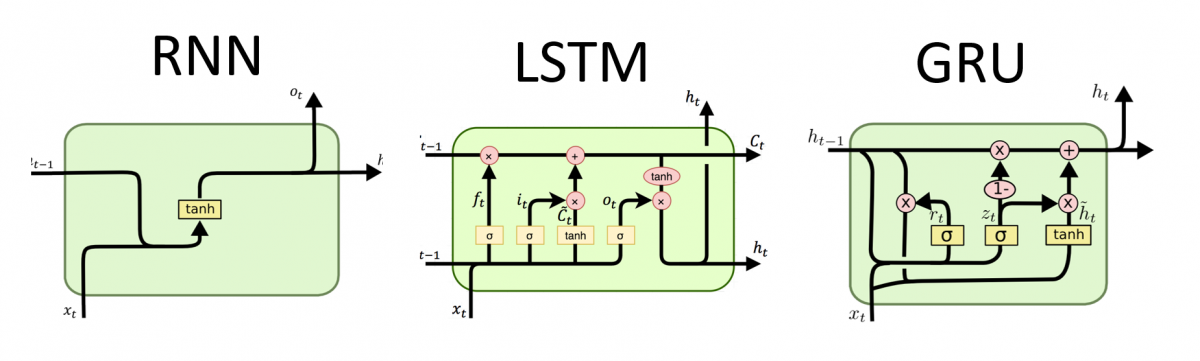

In [16]:
from IPython.display import Image, display, Markdown

rnn_m2m_image_path = '../../images/rnn_m2m.png'
display(Image(filename=rnn_m2m_image_path))

rnn_image_path = '../../images/simplernn.png'
display(Markdown(f'# SimpleRNN / RNN Cell'))
display(Image(filename=rnn_image_path))

lstm_image_path = '../../images/lstm.png'
display(Markdown(f'# LSTM Cell'))
display(Image(filename=lstm_image_path))

rnn_lstm_gru_image_path = '../../images/rnn_lstm_gru.png'
display(Markdown(f'# RNN / LSTM / GRU Cell'))
display(Image(filename=rnn_lstm_gru_image_path))

In [ ]:
class FlexibleRNN(tf.keras.Model):
    def __init__(self, input_size, hidden_size, output_size, rnn_type="rnn"):
        super(FlexibleRNN, self).__init__()

        # Choose the RNN cell type
        if rnn_type.lower() == "rnn":
            self.rnn = tf.keras.layers.SimpleRNN(
                hidden_size, return_sequences=True, return_state=True
            )
        elif rnn_type.lower() == "lstm":
            self.rnn = tf.keras.layers.LSTM(
                hidden_size, return_sequences=True, return_state=True
            )
        elif rnn_type.lower() == "gru":
            self.rnn = tf.keras.layers.GRU(
                hidden_size, return_sequences=True, return_state=True
            )
        else:
            raise ValueError("Invalid rnn_type. Choose 'rnn', 'lstm', 'gru'")

        self.layernorm = LayerNormalization()

        # Fully connected layer to map RNN output to the desired output size
        self.fc = tf.keras.layers.Dense(output_size)

    def call(self, inputs):
        # RNN forward pass
        rnn_out = self.rnn(inputs)

        if len(rnn_out) == 3:
            # LSTM case
            whole_sequence_output, _, _ = rnn_out
        else:
            # SimpleRNN/GRU case
            whole_sequence_output, _ = rnn_out

        # Extract the output from the last time step
        x = self.layernorm(whole_sequence_output[:, -1, :])

        # Fully connected layer
        x = self.fc(x)
        return x

    def train_model(
        self, train_data, train_labels, num_epochs=300, learning_rate=0.001
    ):
        # Define loss function and optimizer
        criterion = tf.keras.losses.MeanSquaredError()
        optimizer = tf.keras.optimizers.Adam(learning_rate)

        for epoch in range(num_epochs):
            # Forward pass
            with tf.GradientTape() as tape:
                outputs = self(train_data)
                loss = criterion(train_labels, outputs)

            # Backward and optimize
            gradients = tape.gradient(loss, self.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.trainable_variables))

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.numpy():.4f}")

    def predict(self, input_data):
        # Make predictions for input_data
        predictions = self(input_data)
        return predictions

In [ ]:
class TransformerModel(tf.keras.Model):
    def __init__(self, input_size, hidden_size, output_size, num_heads=2, num_layers=2):
        super(TransformerModel, self).__init__()

        self.embedding = Dense(hidden_size, activation="relu")

        self.attention_blocks = [Attention(use_scale=True) for _ in range(num_layers)]

        self.fc = Dense(output_size)

    def call(self, inputs):
        # Apply embedding layer
        x = self.embedding(inputs)

        # Transformer blocks
        for attention_block in self.attention_blocks:
            x = attention_block([x, x])

        # Global average pooling
        x = tf.reduce_mean(x, axis=1)

        # Fully connected layer
        output = self.fc(x)

        return output

    def train_model(
        self, train_data, train_labels, num_epochs=300, learning_rate=0.001
    ):
        # Define loss function and optimizer
        criterion = tf.keras.losses.MeanSquaredError()
        optimizer = tf.keras.optimizers.Adam(learning_rate)

        for epoch in range(num_epochs):
            # Forward pass
            with tf.GradientTape() as tape:
                outputs = self(train_data)
                loss = criterion(train_labels, outputs)

            # Backward and optimize
            gradients = tape.gradient(loss, self.trainable_variables)
            optimizer.apply_gradients(zip(gradients, self.trainable_variables))

            if (epoch + 1) % 10 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.numpy():.4f}")

    def predict(self, input_data):
        # Make predictions for input_data
        predictions = self(input_data)
        return predictions

In [ ]:
# Example usage (RNNs for sequence processing):
# Define input size, hidden size, and output size
input_size = 10
hidden_size = 20
output_size = 5

# Create an instance of the FlexibleRNN model with Generic RNN
model = FlexibleRNN(input_size, hidden_size, output_size)

# Create an instance of the FlexibleRNN model with LSTM
model_lstm = FlexibleRNN(input_size, hidden_size, output_size, rnn_type="lstm")

# Create an instance of the FlexibleRNN model with GRU
model_gru = FlexibleRNN(input_size, hidden_size, output_size, rnn_type="gru")

# Generate synthetic training data
train_data = tf.random.normal((100, 8, input_size))
train_labels = tf.random.normal((100, output_size))

# Train the RNN model
model.train_model(train_data, train_labels)

# Train the LSTM model
model_lstm.train_model(train_data, train_labels)

# Train the GRU model
model_gru.train_model(train_data, train_labels)

# Generate a test sequence
test_data = tf.random.normal((1, 8, input_size))

# Make predictions with Generic RNN model
predictions = model.predict(test_data)
print("Predictions:", predictions.numpy())

# Make predictions with LSTM model
predictions_lstm = model_lstm.predict(test_data)
print("Predictions (LSTM):", predictions_lstm.numpy())

# Make predictions with GRU model
predictions_gru = model_gru.predict(test_data)
print("Predictions (GRU):", predictions_gru.numpy())

In [ ]:
# Example usage (transformer for sequence processing):
# Define input size, hidden size, and output size
input_size = 10
hidden_size = 32
output_size = 5

# Create an instance of the TransformerModel
model_transformer = TransformerModel(input_size, hidden_size, output_size)

# Generate synthetic training data
train_data = tf.random.normal((100, 8, input_size))
train_labels = tf.random.normal((100, output_size))

# Train the Transformer model
model_transformer.train_model(train_data, train_labels)

# Generate a test sequence
test_data = tf.random.normal((1, 8, input_size))

# Make predictions with Transformer model
predictions_transformer = model_transformer.predict(test_data)
print("Predictions (Transformer):", predictions_transformer.numpy())